In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Problem 1) (5 pts) 6.1.8

**Solution to Problem 1**

We are given the system

$$
\dot x = y
\dot y = -x+y(1-x^{2})
$$

It can readily be seen that the fixed point is located at the origin as $\dot x = 0$ and $\dot y=0$ at the same time only for $(x,y)=(0,0)$.

So, letting

$$
\dot x = f(x,y)
\dot y = g(x,y)
$$

we proceed to linearize the system, by first taking the partial derivatives with respect to $x$ and $y$ for both functions.

Thus

$$
f_{x}=0, ~ f_{y}=1
g_{x}=-1-2xy, ~ g_{y}=1-x^{2},
$$

which means that our Jacobian matrix is

\begin{gather*}
J=
\begin{bmatrix}
0 & 1\\
-1-2xy & 1-x^{2}
\end{bmatrix}.
\end{gather*}

Evaluated at the fixed point

\begin{gather*}
J=
\begin{bmatrix}
0 & 1\\
-1 & 1
\end{bmatrix}_{|(0,0)}
\end{gather*}


from which we can readily see that the trace $\tau$ is equal to 1 and that the determinant $\Delta$ is equal to 1 as well.

Thus, $\tau^{2}-4\Delta=-3<0$ and the two eigenvalues are 

$$
\lambda_{(+)}= \frac{1+i\sqrt{3}}{2}, ~ \lambda_{(-)}=\frac{1-i\sqrt{3}}{2},
$$

which are a pair of complex conjugates with positive real parts. Therefore the fixed point is an unstable (repelling) spyral.

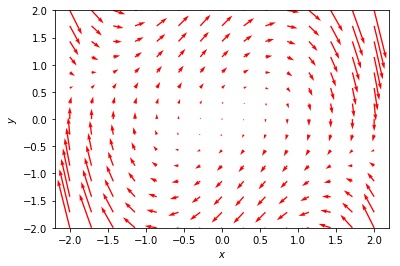

In [27]:
def f(X,t):
    x1,x2 = X
    return [x2, -x1+x2*(1-x1**2)]

x1 = np.linspace(-2,2,15)
x2 = np.linspace(-2,2,15)


X1,X2 = np.meshgrid(x1,x2)

t=0

u,v = np.zeros(X1.shape), np.zeros(X2.shape)

I, J = X1.shape

for ii in range(I):
    for jj in range(J):
        x = X1[ii, jj]
        y = X2[ii, jj]
        Xprime = f([x, y], t)
        u[ii,jj] = Xprime[0]
        v[ii,jj] = Xprime[1]
        
Q = plt.quiver(X1, X2, u, v, color='r')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim([-2,2]);

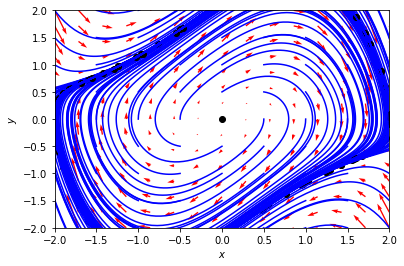

In [37]:
x1 = np.linspace(-2,2,20)
x2 = np.linspace(-2,2,20)

Q = plt.quiver(X1, X2, u, v, color='r')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.ylim([-2,2]);

from scipy.integrate import odeint #plot some solutions
l = [-2.0,-1.5,-1.0,-0.5,0,0.5, 1, 1.5, 2.0]
for x20 in l:
    for x10 in l:
        tspan = np.linspace(0, 20, 600) #make them look as smooth as possible #600 is good
        x0 = [x10, x20]
        xs = odeint(f, x0, tspan)
        plt.plot(xs[:,0], xs[:,1], 'b-') # path
        plt.plot([xs[-1,0]], [xs[-1,1]], 'o',color='k') # end #asymptotically stable spyral at the origin
    

plt.xlim([-2, 2])

plt.show()

Problem 2) (5 pts) 6.3.11

**Solution to Problem 2**

**Part a**


The given system is

$$
\dot r=-r
$$
$$
\dot\theta=\frac{1}{\ln{r}}.
$$

Solving both ODE's explicitly, with initial conditions $(r_{0},\theta_{0})$ leads to

$$
r=r_{0}e^{-t},
$$

and

$$
\dot\theta=\frac{1}{\ln(r_{0}e^{-t})}=\frac{1}{\ln(r_{0})-t}
$$

$$
\Rightarrow \theta = -\ln|\xi-t|+\theta_{0},
$$

where $\xi=\ln(r_{0})$.

**Part b**

For the limit as $t\rightarrow\infty$ we have

$$
\lim_{t\rightarrow\infty}r(t) = \lim_{t\rightarrow\infty} r_{0}e^{-t}=0,
$$

since $e^{-t}\rightarrow0$ as $t\rightarrow\infty$.


Whereas

$$
\lim_{t\rightarrow\infty}|\theta(t)| = \lim_{t\rightarrow\infty}|-\ln|\xi -t|+\theta_{0}|=\infty
$$

as $\ln|-t|\rightarrow\infty$ as $t\rightarrow\infty$.

**Part c and d**

For

$$
x = r\cos(\theta); ~ ~ ~ y = r\sin(\theta)
$$

we rederive the system in Cartesian coordinates. The chain rule yields

$$
\dot{x} = \dot{r}\cos(\theta) - r \dot{\theta}\sin(\theta), \\
\dot{y} = \dot{r}\sin(\theta) + r \dot{\theta}\cos(\theta)
$$

and thus

$$
\dot{x} = -r\cos(\theta) - r \frac{1}{\ln|r|}\sin(\theta), \\
\dot{y} = -r\sin(\theta) + r \frac{1}{\ln|r|}\cos(\theta).
$$

Using $r = \sqrt{x^{2}+y^{2}}$, we get 

$$
\dot{x} = -\sqrt{x^{2}+y^{2}}\cos(\theta) - \sqrt{x^{2}+y^{2}} \frac{1}{\ln|\sqrt{x^{2}+y^{2}}|}\sin(\theta), \\
\dot{y} = -\sqrt{x^{2}+y^{2}}\sin(\theta) + \sqrt{x^{2}+y^{2}} \frac{1}{\ln|\sqrt{x^{2}+y^{2}}|}\cos(\theta),
$$


and finally


$$
\dot{x} = -x + \frac{2y}{\ln|{x^{2}+y^{2}}|} \\
\dot{y} = -y - \frac{2x}{\ln|{x^{2}+y^{2}}|}.
$$

Linearizing the system yields

$$
\dot{x} = -x \\
\dot{y} = -y.
$$


Problem 3) (5 pts) 6.5.7

**Solution to Problem 3**

The relativistic equation for the orbit of a planet around the sun is given by

$$
\frac{d^{2}}{d\theta^{2}}+u=\alpha+\epsilon u^{2},
$$

where $u=1/r$ and $r$ and $\theta$ are the polar coordinate of the planet in its plane of motion. We are told that $\alpha>0$ and that $\epsilon$ is a very small positive parameter.

**Part a**

Letting $v=\frac{du}{d\theta}$ we rewrite the equation as a 2-D system

\begin{align}
u_{\theta}=v=f(u,v)\\
v_{\theta}=\alpha+\epsilon u^{2}-u=g(u,v)
\end{align}

**Part b and c**

Taking partial derivatives, we get the Jacobian for the system

\begin{gather*}
J=
\begin{bmatrix}
0 & 1\\
2\epsilon u-1 & 0
\end{bmatrix}.
\end{gather*}

We can readily find the fixed points and then evaluate the Jacobian at them. So

\begin{align}
f(u,v)=0\longrightarrow v=0,\\
g(u,v)=0\longrightarrow \epsilon u^{2}-u+\alpha=0\longrightarrow u_{(+/-)}=\frac{1}{2\epsilon}\left(1\pm\sqrt{1-4\alpha\epsilon}\right)
\end{align}

So we have two fixed points

$$
(u_{1\ast},v_{1\ast})=\left(\frac{1+\sqrt{1-4\alpha\epsilon}}{2\epsilon},0\right),
$$
$$
(u_{2\ast},v_{2\ast})=\left(\frac{1-\sqrt{1-4\alpha\epsilon}}{2\epsilon},0\right).
$$

We now compute the Jacobian at both of them to study their stability

\begin{gather*}
J=
\begin{bmatrix}
0 & 1\\
1\pm\sqrt{1-4\alpha\epsilon}-1 & 0
\end{bmatrix},
\end{gather*}

therefore, we see that the trace $\tau=0$ and the determinant is $\Delta\mp\sqrt{1-4\alpha\epsilon}$.
Since $\epsilon$ is very small we take it to be $\epsilon<<1$, therefore we can approximate our determinant as $\Delta\approx\pm 1$.

Thus, the determinant for $(u_{1\ast},v_{1\ast})$ is $1$, while the determinant for $(u_{2\ast},v_{2\ast})$ is $-1$, while the trace is $0$ for both of them. So, $(u_{2\ast},v_{2\ast})$ is a saddle (it has negative determinant), while for $(u_{1\ast},v_{1\ast})$ we have $\tau-4\Delta=-4<0$, therefore the fixed point is a center.

To check if $(u_{1\ast},v_{1\ast})$ is a nonlinear center, we notice that $f(u,v)$ is odd with respect to $v$, in fact

$$
f(u,-v)=v=-f(u,v)
$$

while $g(u,v)$ is even with respect to $v$ as

$$
g(u,-v)=g(u,v),
$$

therefore the system is invariant under the transformation $t\rightarrow-t$ and $v\rightarrow-v$ (the system is reversible). 

Let us rewrite the center as

$$
\left(\frac{1+\sqrt{1-4\alpha\epsilon}}{2\epsilon},0\right) \longrightarrow \left(\frac{1}{\epsilon},0\right)
$$

since $\sqrt{1-4\alpha\epsilon}\approx 1$.

Then, we shift our coordinates to the right by introducing the new variable

$$
\tilde{u}=u-\frac{1}{\epsilon}
$$

so then we can rewrite our system as

$$
\tilde{u}_{\theta}=\tilde{u}=v
$$
$$
v=_{\theta}=\alpha+\epsilon\left(u-\frac{1}{\epsilon}\right)^{2}-u+\frac{1}{\epsilon}.
$$

So now we have shifted our origin to the right by $1/\epsilon$ and we can make the argument that reversibility on a linear center makes it a nonlinear.

**Part d**



So, reminding ourselves that

$$
u=\frac{1}{r}
$$

then, at the fixed point, it holds

$$
u_{1\ast}=\frac{1}{\epsilon}=\frac{1}{r}\longrightarrow r=\epsilon.
$$

At our fixed point we also have $v=0$, thus

$$
\frac{du}{d\theta}=0,
$$

which we can express as

\begin{align}
\frac{\partial{u}}{\partial{r}}\frac{\partial{r}}{\partial{\theta}}=-\frac{1}{r^{2}}\frac{dr}{d\theta}=0\\
\longrightarrow -\frac{1}{\epsilon^{2}}\frac{dr}{d\theta}=0,
\end{align}

which implies

$$
\frac{dr}{d\theta}=0\longrightarrow r= C,
$$

where $C$ is a positive constant.
Since we have a constant distance $r$ between the sun and the planet in motion, then the planet has to undergo a circular orbit to mantain such distant constant. Thus, we have a circular planetary orbit for the fixed point under study.

Problem 4) (5 pts) 6.5.15

**Solution to Problem 4**

**Part a**

For the undamped frictionless bead we have

$$
mr\ddot\phi=-mg\sin(\phi)+mr\omega^{2}\sin(\phi)\cos(\phi).
$$

Introducing the nondimensionless time

$$
\tau =\omega t
$$

we derive

$$
\dot\phi=\frac{d\phi}{dt}=\frac{d\phi}{d\tau}\frac{d\tau}{dt}=\omega\phi^{\prime}
$$

where the prime notation indicates derivation with respect to $\tau$. So, using the same tecnique we derive

$$
\ddot\phi=\omega^{2}\phi^{\prime\prime}.
$$

Then we can rewrite our ODE as

$$
mr\omega^{2}\phi^{\prime\prime}=-mg\sin(\phi)+mr\omega^{2}\sin(\phi)\cos(\phi);
$$

we divide by the gravitational component of the force $mg$ and we get

$$
\frac{r\omega^{2}}{g}\phi^{\prime\prime}=-\sin(\phi)+\frac{r\omega^{2}}{g}\sin(\phi)\cos(\phi),
$$

which, since $\frac{r\omega^{2}}{g}=\gamma$ can be rewritten as

\begin{align}
\phi^{\prime\prime}=-\gamma^{-1}\sin(\phi)+\sin(\phi)\cos(\phi)\\
= \sin(\phi)(\cos(\phi)-\gamma^{-1})
\end{align}

which is the desired result.

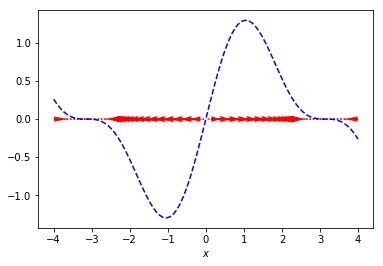

In [64]:
g = -1
xvals = np.linspace(-4,4,90)
yvals = np.zeros(xvals.size)
xdprime = np.sin(xvals)*(np.cos(xvals)-(1/g))
ydprime = np.zeros(xvals.size)
plt.plot(xvals, np.sin(xvals)*(np.cos(xvals)-(1/g)),'--',color='b')
plt.quiver(xvals,yvals, xdprime, ydprime,color='r');
plt.xlabel('$x$');

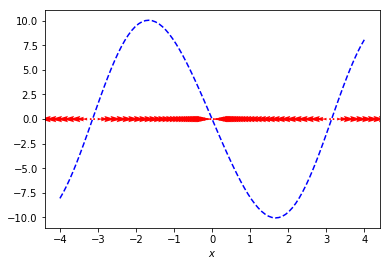

In [56]:
g = 0.1
xvals = np.linspace(-4,4,90)
yvals = np.zeros(xvals.size)
xdprime = np.sin(xvals)*(np.cos(xvals)-(1/g))
ydprime = np.zeros(xvals.size)
plt.plot(xvals, np.sin(xvals)*(np.cos(xvals)-(1/g)),'--',color='b')
plt.quiver(xvals,yvals, xdprime, ydprime,color='r');
plt.xlabel('$x$');

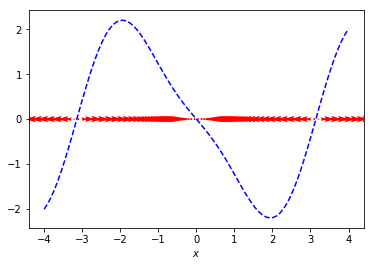

In [57]:
g = 0.5
xvals = np.linspace(-4,4,90)
yvals = np.zeros(xvals.size)
xdprime = np.sin(xvals)*(np.cos(xvals)-(1/g))
ydprime = np.zeros(xvals.size)
plt.plot(xvals, np.sin(xvals)*(np.cos(xvals)-(1/g)),'--',color='b')
plt.quiver(xvals,yvals, xdprime, ydprime,color='r');
plt.xlabel('$x$');

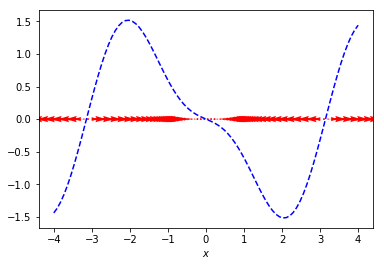

In [59]:
g = 0.8
xvals = np.linspace(-4,4,90)
yvals = np.zeros(xvals.size)
xdprime = np.sin(xvals)*(np.cos(xvals)-(1/g))
ydprime = np.zeros(xvals.size)
plt.plot(xvals, np.sin(xvals)*(np.cos(xvals)-(1/g)),'--',color='b')
plt.quiver(xvals,yvals, xdprime, ydprime,color='r');
plt.xlabel('$x$');

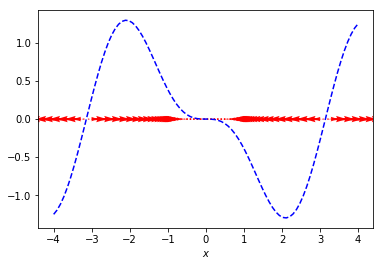

In [60]:
g = 1
xvals = np.linspace(-4,4,90)
yvals = np.zeros(xvals.size)
xdprime = np.sin(xvals)*(np.cos(xvals)-(1/g))
ydprime = np.zeros(xvals.size)
plt.plot(xvals, np.sin(xvals)*(np.cos(xvals)-(1/g)),'--',color='b')
plt.quiver(xvals,yvals, xdprime, ydprime,color='r');
plt.xlabel('$x$');

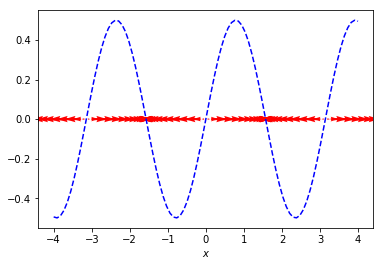

In [63]:
g = 3
xvals = np.linspace(-4,4,90)
yvals = np.zeros(xvals.size)
xdprime = np.sin(xvals)*(np.cos(xvals)-(1/g))
ydprime = np.zeros(xvals.size)
plt.plot(xvals, np.sin(xvals)*(np.cos(xvals)-(1/g)),'--',color='b')
plt.quiver(xvals,yvals, xdprime, ydprime,color='r');
plt.xlabel('$x$');

Problem 5) (5 pts) 6.7.4

**Solution to Problem 5**

**Part a**


We are given 


$$
\ddot{\theta} + \sin\theta = 0
$$

with an amplitude of $\alpha$.

$$
\dot{\theta}\ddot{\theta} + \dot{\theta}\sin\theta = 0 \\
\Rightarrow \frac{d}{dt}\left(\frac{1}{2}\dot{\theta}^{2} - \cos\theta \right) = 0 \\
\Rightarrow \frac{1}{2}\dot{\theta}^{2} - \cos\theta + \cos\alpha = 0\\
\Rightarrow \dot{\theta}^{2} = 2(\cos\theta - \cos\alpha) \\
\Rightarrow \frac{d\theta}{dt} = \left(2(\cos\theta - \cos\alpha)\right)^{1/2}\\
\Rightarrow T = 4\int_{0}^{\alpha}\frac{d\theta}{\left(2(\cos\theta - \cos\alpha)\right)^{1/2}}
$$

**Part b**

Using the half-angle identities

$$
\sin\left(\frac{\alpha}{2}\right) = \sqrt{\frac{1-\cos\alpha}{2}} \Rightarrow -2\sin^{2}\left(\frac{\alpha}{2}\right) + 1 = \cos\alpha
$$

we can rewrite the integral as

$$
T = 4\int_{0}^{\alpha}\frac{d\theta}{\left(2(-2\sin^{2}\left(\frac{\theta}{2}\right) + 2\sin^{2}\left(\frac{\alpha}{2}\right))\right)^{1/2}} \\
= 4\int_{0}^{\alpha}\frac{d\theta}{\left(4(\sin^{2}\left(\frac{\alpha}{2}\right) - \sin^{2}\left(\frac{\theta}{2}\right))\right)^{1/2}}.
$$

Now we use 

$$
(\sin\left(\frac{\alpha}{2}\right))\sin\phi = \sin\left(\frac{\theta}{2}\right) \\
\Rightarrow (\sin\left(\frac{\alpha}{2}\right))\cos\phi d\phi = \frac{1}{2}\cos\left(\frac{\theta}{2}\right)d\theta \\
d\theta = \frac{2(\sin\left(\frac{\alpha}{2}\right))\cos\phi}{\cos\left(\frac{\theta}{2}\right)} d\phi
$$

which gives us 

$$
T = 4\int_{0}^{\frac{\pi}{2}}\frac{\frac{2(\sin\left(\frac{\alpha}{2}\right))\cos\phi}{\cos\left(\frac{\theta}{2}\right)} d\phi}{\left(4(\sin^{2}\left(\frac{\alpha}{2}\right) - \sin^{2}\left(\frac{\alpha}{2}\right)\sin^{2}\left(\frac{\phi}{2}\right))\right)^{1/2}} \\
= 4\int_{0}^{\frac{\pi}{2}}\frac{\frac{2(\sin\left(\frac{\alpha}{2}\right))\cos\phi}{\cos\left(\frac{\theta}{2}\right)} d\phi}{2\sin\left(\frac{\alpha}{2}\right)\cos\phi} \\
= 4\int_{0}^{\frac{\pi}{2}}\frac{d\phi}{\cos\left(\frac{\theta}{2}\right)} = 4\int_{0}^{\frac{\pi}{2}}\frac{d\phi}{\sqrt{1 - \sin^{2}\left(\frac{\theta}{2}\right)}} \\
$$

and thus we get the following elliptical integral of the first order

$$
T = 4\int_{0}^{\frac{\pi}{2}}\frac{d\phi}{\sqrt{1 - \sin^{2}\left(\frac{\alpha}{2}\right)\sin^{2}\left(\phi\right)}}
$$ 

where we let $m = \sin^{2}\left(\frac{\alpha}{2}\right)$.

So, $T = 4k(m)$ where

$$
k(m) = 4\int_{0}^{\frac{\pi}{2}}\frac{d\phi}{\sqrt{1 - m\sin^{2}\left(\phi\right)}}; ~ ~ ~ 0 \leq m \leq 1.
$$